# Detection Malicious URL Using ML Models

A URL consists of the top-level domain, hostname, paths, and port of the web
address, as in the following diagram:

![url](https://user-images.githubusercontent.com/70811337/150021474-4ba64b34-1d09-427f-9cf6-25508571d18d.PNG)

<h2 style="width: 100%;
    margin: 0;
    padding: 0;
    text-align: center;">---- Table of contents ----</h2>

1. [Importing Libraries](#1)
2. [Load Dataset](#2)
3. [Meta information of Dataframe](#3)
4. [Checking for NaN values](#4)
5. [Feature Extraction](#5)
6. [Train & Test Split](#6)
7. [Training models](#7)
  <ul>
      <li>✔️ Decision Tree Classifier</li>
      <li>✔️ Random Forest Classifier</li>
      <li>✔️ AdaBoost Classifier</li>
      <li>✔️ KNeighbors Classifier</li>
      <li>✔️ SGD Classifier</li>
      <li>✔️ Extra Trees Classifier</li>
      <li>✔️ Gaussian NB</li>
  </ul>
8. [Final Report](#8)

In [ ]:
pip install tld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412 kB 5.5 MB/s 


In [ ]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<a id="1"></a> <br>
# 📥 Importing Libraries

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id="2"></a> <br>
# 🗃️ Load Dataset

In [2]:
data = pd.read_csv('malicious_phish.csv')
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [3]:
data.shape

(651191, 2)

In [9]:
data.type.unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

<a id="3"></a> <br>
# 📝 Meta information of Dataframe

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


<a id="4"></a>
# 🔎 Checking for NaN values

In [11]:
data.isnull().sum()

url     0
type    0
dtype: int64

In [12]:
count = data.type.value_counts()
count

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

Text(0, 0.5, 'Count')

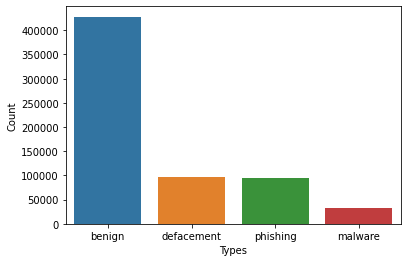

In [14]:
sns.barplot(x=count.index, y=count)

plt.xlabel('Types')
plt.ylabel('Count')

<h4>first have to omit the (www.) from the URL which is in fact a sub domain in itself.</h4>

In [13]:
data['url'] = data['url'].replace('www.', '', regex=True)
data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [14]:
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [15]:
rem = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
data['Category'] = data['type']
data = data.replace(rem)
data

,url,type,Category
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2
651188,gamespot.com/xbox360/action/deadspace/,phishing,2
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2


In [16]:
data

,url,type,Category
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2
651188,gamespot.com/xbox360/action/deadspace/,phishing,2
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2


<a id="B"></a> <br>
# 🦾 Feature Extraction

In [17]:
data['url_len'] = data['url'].apply(lambda x: len(str(x)))

In [18]:
def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [19]:
data['domain'] = data['url'].apply(lambda i: process_tld(i))

In [20]:
data.head()

,url,type,Category,url_len,domain
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net


In [21]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))

In [22]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1


In [23]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        # print(f'Abnormal  URL: {url}   ===================   HOSTNAME: {hostname}')
        return 0

In [24]:
data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))

<BarContainer object of 2 artists>

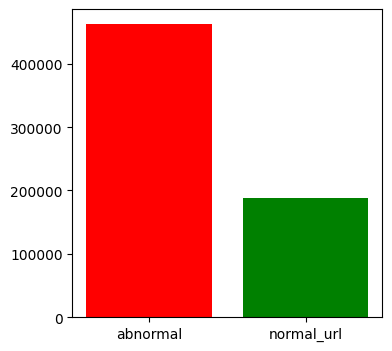

In [25]:
abnormal , normal = data['abnormal_url'].value_counts()
label = ['abnormal', 'normal_url']

import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.bar(label, [abnormal, normal], color=['red', 'green'])

In [26]:
def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [27]:
data['https'] = data['url'].apply(lambda i: httpSecure(i))

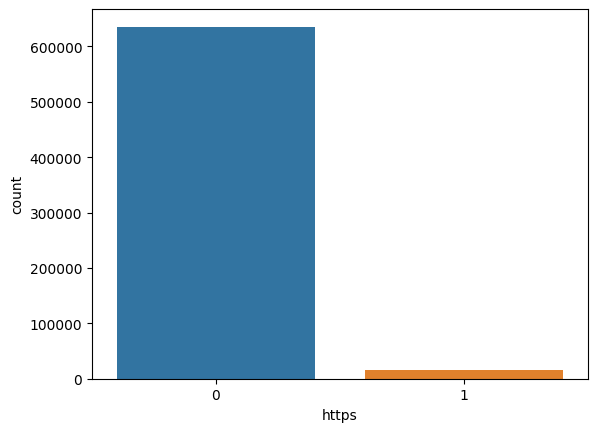

In [28]:
sns.countplot(x='https', data=data);

<h4>Counts the number of digit characters in a URL</h4>

In [29]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [30]:
data['digits']= data['url'].apply(lambda i: digit_count(i))

<h4>Counts the number of letter characters in a URL</h4>

In [31]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [32]:
data['letters']= data['url'].apply(lambda i: letter_count(i))

<h4>Checks to see whether URL contains a shortening service</h4>

In [33]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

In [34]:
data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))

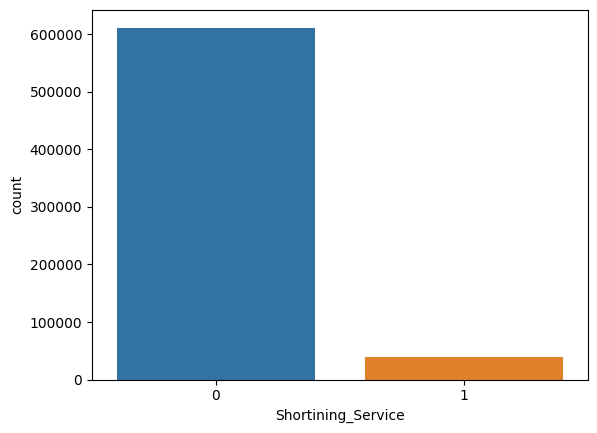

In [35]:
sns.countplot(x='Shortining_Service', data=data);

In [36]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

In [37]:
data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))

In [38]:
data['having_ip_address'].value_counts()

0    638703
1     12488
Name: having_ip_address, dtype: int64

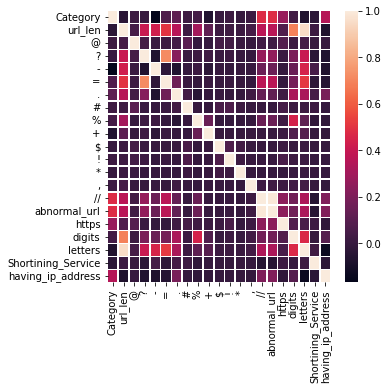

In [41]:
plt.figure(figsize=(5, 5))
sns.heatmap(data.corr(), linewidths=.5)

In [39]:
X = data.drop(['url','type','Category','domain'],axis=1)#,'type_code'
y = data['Category']

In [40]:
X

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,16,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,13,0,0
1,35,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,29,0,0
2,31,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,25,0,0
3,84,0,1,1,4,2,0,0,0,0,0,0,0,1,1,0,7,60,0,0
4,235,0,1,1,3,2,0,0,0,0,0,0,0,1,1,0,22,199,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,39,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,12,21,0,0
651187,44,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,7,29,1,0
651188,38,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,30,1,0
651189,45,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,36,0,0


<a id="6"></a> <br>
# ✂️ Train & Test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

<a id="7"></a> <br>
# <img src="https://cdn-icons-png.flaticon.com/32/4149/4149680.png"/> Training models

In [29]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

#############################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  90.97%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     85565
           1       0.93      0.96      0.95     19319
           2       0.81      0.57      0.66     18805
           3       0.94      0.91      0.93      6550

    accuracy                           0.91    130239
   macro avg       0.90      0.85      0.87    130239
weighted avg       0.90      0.91      0.90    130239

             Confusion_matrix 


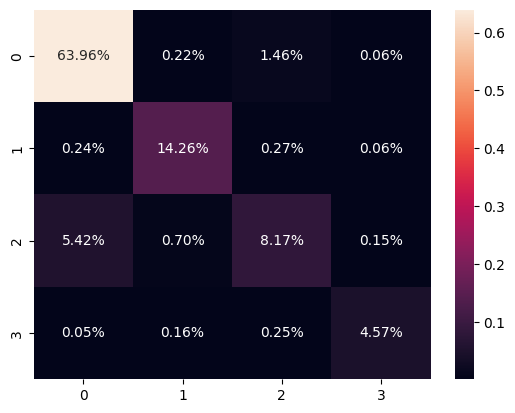

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  91.47%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85565
           1       0.94      0.96      0.95     19319
           2       0.83      0.57      0.68     18805
           3       0.96      0.91      0.94      6550

    accuracy                           0.91    130239
   macro avg       0.91      0.86      0.88    130239
weighted avg       0.91      0.91      0.91    130239

             Confusion_matrix 


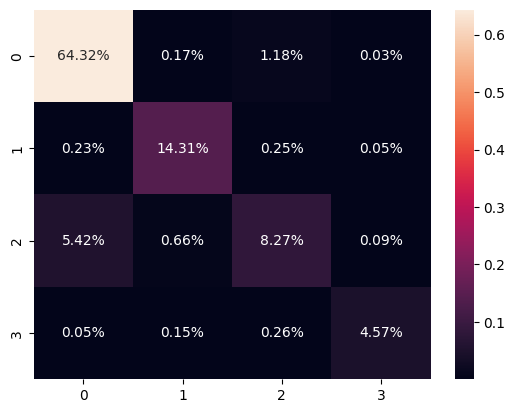

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 
Test Accuracy :  82.01%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.84      0.98      0.90     85565
           1       0.82      0.89      0.85     19319
           2       0.45      0.15      0.22     18805
           3       0.91      0.46      0.61      6550

    accuracy                           0.82    130239
   macro avg       0.75      0.62      0.65    130239
weighted avg       0.78      0.82      0.78    130239

             Confusion_matrix 


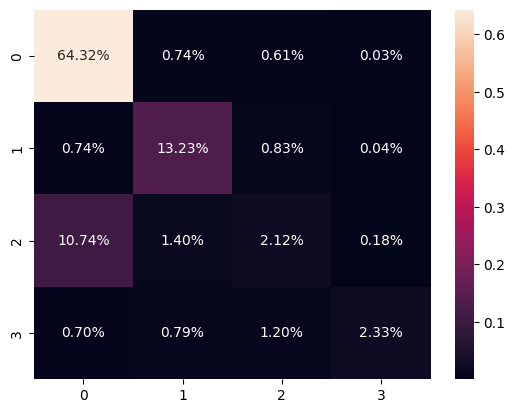

###################- End -###################
#############################################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 
Test Accuracy :  89.04%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     85565
           1       0.89      0.95      0.92     19319
           2       0.74      0.52      0.61     18805
           3       0.94      0.87      0.91      6550

    accuracy                           0.89    130239
   macro avg       0.87      0.83      0.84    130239
weighted avg       0.88      0.89      0.88    130239

             Confusion_matrix 


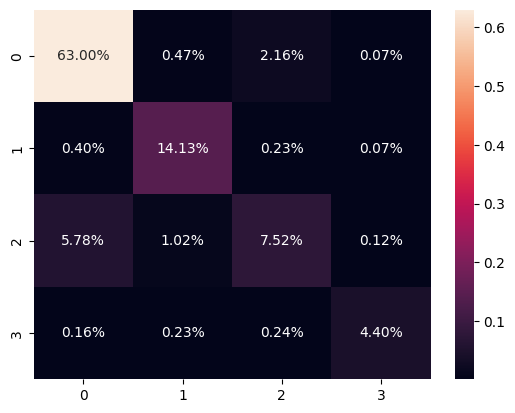

###################- End -###################
#############################################
######-Model => <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> 
Test Accuracy :  79.84%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     85565
           1       0.74      0.97      0.84     19319
           2       0.32      0.11      0.17     18805
           3       0.82      0.55      0.66      6550

    accuracy                           0.80    130239
   macro avg       0.68      0.64      0.64    130239
weighted avg       0.75      0.80      0.76    130239

             Confusion_matrix 


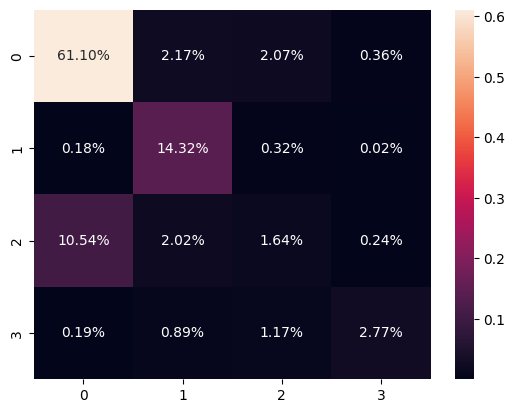

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> 
Test Accuracy :  91.47%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85565
           1       0.93      0.97      0.95     19319
           2       0.83      0.57      0.68     18805
           3       0.97      0.91      0.94      6550

    accuracy                           0.91    130239
   macro avg       0.91      0.86      0.88    130239
weighted avg       0.91      0.91      0.91    130239

             Confusion_matrix 


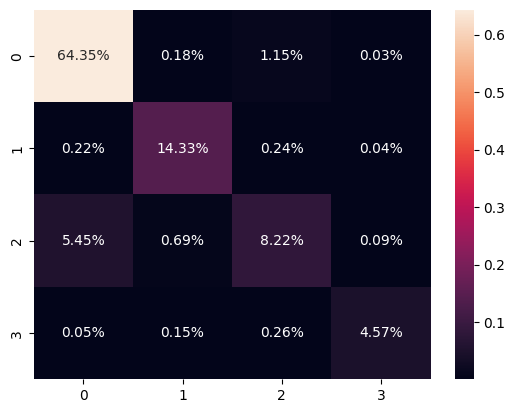

###################- End -###################
#############################################
######-Model => <class 'sklearn.naive_bayes.GaussianNB'> 
Test Accuracy :  78.95%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     85565
           1       0.66      1.00      0.79     19319
           2       0.60      0.02      0.04     18805
           3       0.61      0.70      0.65      6550

    accuracy                           0.79    130239
   macro avg       0.68      0.66      0.59    130239
weighted avg       0.77      0.79      0.74    130239

             Confusion_matrix 


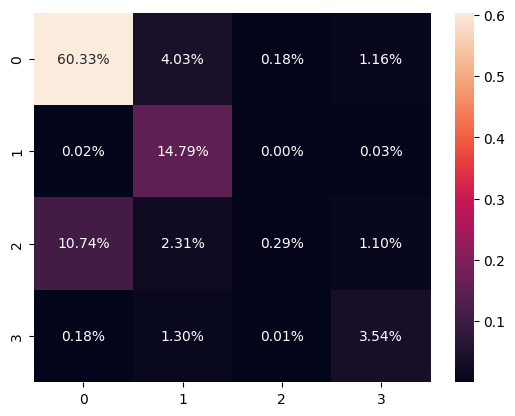

###################- End -###################


In [ ]:
models = [DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,KNeighborsClassifier,SGDClassifier,
         ExtraTreesClassifier,GaussianNB]

# accuracy_test=[]
# for m in models:
#     print('#############################################')
#     print('######-Model =>\033[07m {} \033[0m'.format(m))
#     model_ = m()
#     model_.fit(X_train, y_train)
#     pred = model_.predict(X_test)
#     acc = accuracy_score(pred, y_test)
#     accuracy_test.append(acc)
#     print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
#     print('\033[01m              Classification_report \033[0m')
#     print(classification_report(y_test, pred))
#     print('\033[01m             Confusion_matrix \033[0m')
#     cf_matrix = confusion_matrix(y_test, pred)
#     plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
#     plt.show()
#     print('\033[31m###################- End -###################\033[0m')

In [42]:
from sklearn import svm
from sklearn import linear_model 
from sklearn import tree
from sklearn import ensemble


def prediction_model(model_name, model , xtrain , ytrain, xtest , ytest):
    clf = model.fit(X_train, y_train)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f'Prediction Score from {model_name} is : {score}')
    return model, score  

# Random forest

In [43]:
# svm_model , s = prediction_model('SVM',  svm.SVC() , X_train , y_train, X_test , y_test)
rd_model , s = prediction_model('Random Forest',  ensemble.RandomForestClassifier() , X_train , y_train, X_test , y_test)
# dt_model , s = prediction_model('Decision Tree',  tree.DecisionTreeClassifier() , X_train , y_train, X_test , y_test)

Prediction Score from Random Forest is : 0.9148411766060858


In [71]:
# print(y_test[:20])
X_test.iloc[1].values

array([84,  0,  1,  1,  3,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 13,
       59,  0,  0], dtype=int64)

In [5]:
import joblib
# joblib.dump(rd_model , 'url_classifier_randomforest_model.jb')
d1 = [[84,  0,  1,  1,  3,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 13, 59,  0,  0]]
data = [[88, 0, 1, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 7, 63, 0, 0]]
radom_forest = joblib.load('url_classifier_randomforest_model.jb')
# radom_forest.predict(data)
print(radom_forest)

RandomForestClassifier()


# SGD MODEL ...... 

In [47]:
SGD_model , s = prediction_model('SGDC', SGDClassifier() , X_train , y_train, X_test , y_test)

Prediction Score from SGDC is : 0.8099801134836723


In [3]:
import joblib
# joblib.dump(SGD_model , 'url_SGD_model.jb')
d1 = [[84,  0,  1,  1,  3,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 13, 59,  0,  0]]
data = [[88, 0, 1, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 7, 63, 0, 0]]
md2 = joblib.load('url_SGD_model.jb')
print(md2)
# md2.predict(data)

SGDClassifier()


In [49]:
from sklearn.naive_bayes import GaussianNB
ada_boost , s = prediction_model('ada boost', AdaBoostClassifier() , X_train , y_train, X_test , y_test)

Prediction Score from ada boost is : 0.8200769354801557


In [2]:
import joblib
# joblib.dump(ada_boost , 'url_adaboost_model.jb')
boost_model = joblib.load('url_adaboost_model.jb')
# boost_model.predict(data)
print(boost_model)

AdaBoostClassifier()


In [ ]:
pd.to_csv('')

Prediction Score from Random Forest is : 0.9150177750136288
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85565
           1       0.94      0.97      0.95     19319
           2       0.83      0.57      0.68     18805
           3       0.96      0.91      0.93      6550

    accuracy                           0.92    130239
   macro avg       0.91      0.86      0.88    130239
weighted avg       0.91      0.92      0.91    130239

[[83776   207  1542    40]
 [  290 18648   313    68]
 [ 7013   873 10801   118]
 [   67   200   337  5946]]


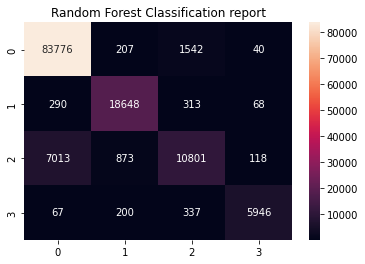

In [32]:
# model evaluation 
from sklearn import model_selection
from sklearn import metrics
import seaborn as sn

# # svm
# svm_predict = svm_model.predict(X_test)
# report = metrics.classification_report(y_test, svm_predict)
# print(report)

def evaluation_report(model_name, model , xtrain , ytrain, xtest , ytest):
#     perform prediction
    m , s = prediction_model(model_name, model , xtrain , ytrain, xtest , ytest)
    predictions = m.predict(xtest)
    report = metrics.classification_report(y_test, predictions)
    cm = metrics.confusion_matrix(y_test, predictions)
    print(report)
    print(cm)
    return report, cm 





r, c = evaluation_report('Random Forest',  ensemble.RandomForestClassifier() , \
                         X_train , y_train, X_test , y_test)
plt.title('Random Forest Classification report')
sn.heatmap(c, annot=True,  fmt='d')

**ADA bost Classifier**

In [ ]:
# AdaBoostClassifier(n_estimators=100, random_state=0)
SGD_model , s = prediction_model('SGDC', SGDClassifier() , X_train , y_train, X_test , y_test)

<a id="8"></a> <br>
# <img src="https://cdn-icons-png.flaticon.com/64/3094/3094836.png"/> Final Report

In [ ]:
output = pd.DataFrame({"Model":['Decision Tree Classifier','Random Forest Classifier',
                                'AdaBoost Classifier','KNeighbors Classifier','SGD Classifier',
                                'Extra Trees Classifier','Gaussian NB'],
                      "Accuracy":accuracy_test})

In [ ]:
output

,Model,Accuracy
0,Decision Tree Classifier,0.909658
1,Random Forest Classifier,0.914749
2,AdaBoost Classifier,0.820077
3,KNeighbors Classifier,0.890409
4,SGD Classifier,0.798378
5,Extra Trees Classifier,0.914657
6,Gaussian NB,0.789548


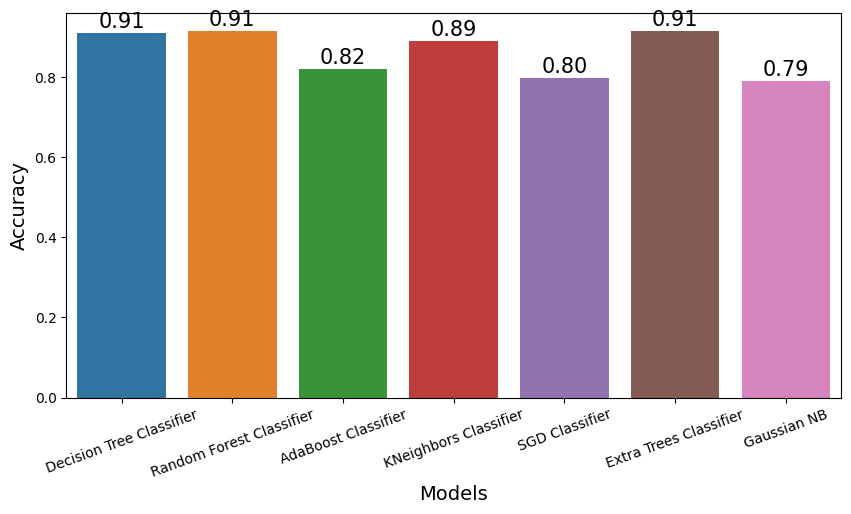

In [ ]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()

In [ ]:
# X_train, X_test, y_train, y_test
# models = [DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,KNeighborsClassifier,SGDClassifier,
#          ExtraTreesClassifier,GaussianNB]
from sklearn import svm
from sklearn import linear_model 
from sklearn import tree
from sklearn import ensemble


def prediction_model(model_name, model , xtrain , ytrain, xtest , ytest):
    clf = model.fit(X_train, y_train)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f'Prediction Score from {model_name} is : {score}')
    return model, score    


In [ ]:
svm_model , s = prediction_model('SVM',  svm.SVC() , X_train , y_train, X_test , y_test)
rd_model , s = prediction_model('Random Forest',  ensemble.RandomForestClassifier() , X_train , y_train, X_test , y_test)
dt_model , s = prediction_model('Decision Tree',  tree.DecisionTreeClassifier() , X_train , y_train, X_test , y_test)